In [50]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [51]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

stu_df = pd.read_sql_query('select * from studentsperformance',con=engine)
stu_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


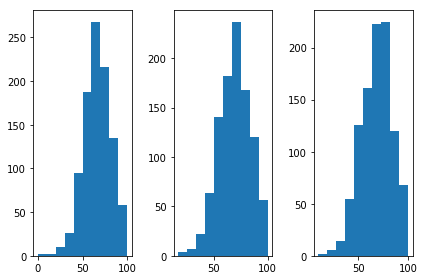

In [52]:
plt.subplot(1,3,1)
plt.hist(stu_df['math score'])
plt.subplot(1,3,2)
plt.hist(stu_df['reading score'])
plt.subplot(1,3,3)
plt.hist(stu_df['writing score'])
plt.tight_layout()
plt.show()

In [53]:
stu_df['math score'].fillna(stu_df['math score'].mean(), inplace = True)
stu_df['reading score'].fillna(stu_df['reading score'].mean(), inplace = True)
stu_df['writing score'].fillna(stu_df['writing score'].mean(), inplace = True)
stu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [54]:
def scrap_zeroes(x):
    if(x == 0):
        return .01
    else:
        return x
stu_df['math score'] = stu_df['math score'].apply(scrap_zeroes)
stu_df['reading score'] = stu_df['reading score'].apply(scrap_zeroes)
stu_df['writing score'] = stu_df['writing score'].apply(scrap_zeroes)
stu_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72,74
1,female,group C,some college,standard,completed,69.0,90,88
2,female,group B,master's degree,standard,none,90.0,95,93
3,male,group A,associate's degree,free/reduced,none,47.0,57,44
4,male,group C,some college,standard,none,76.0,78,75
5,female,group B,associate's degree,standard,none,71.0,83,78
6,female,group B,some college,standard,completed,88.0,95,92
7,male,group B,some college,free/reduced,none,40.0,43,39
8,male,group D,high school,free/reduced,completed,64.0,64,67
9,female,group B,high school,free/reduced,none,38.0,60,50


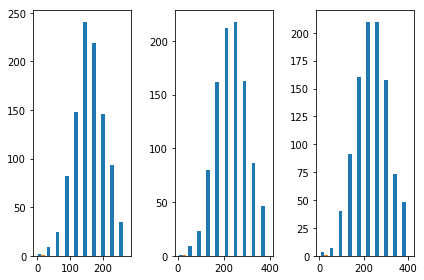

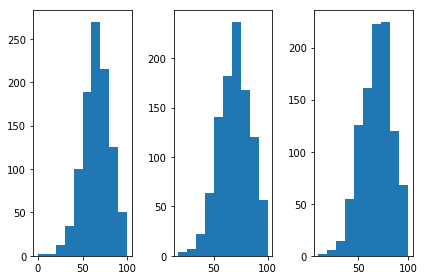

In [55]:
from scipy.stats import boxcox
math_box = boxcox(stu_df['math score'])
reading_box = boxcox(stu_df['reading score'])
writing_box = boxcox(stu_df['writing score'])
plt.subplot(1,3,1)
plt.hist(math_box)
plt.subplot(1,3,2)
plt.hist(reading_box)
plt.subplot(1,3,3)
plt.hist(writing_box)
plt.tight_layout()
plt.show()
plt.subplot(1,3,1)
plt.hist(stu_df['math score'])
plt.subplot(1,3,2)
plt.hist(stu_df['reading score'])
plt.subplot(1,3,3)
plt.hist(stu_df['writing score'])
plt.tight_layout()
plt.show()

In [56]:
stu_df['cumulative score'] = stu_df['math score'] + stu_df['reading score'] + stu_df['writing score']
stu_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,cumulative score
0,female,group B,bachelor's degree,standard,none,72.0,72,74,218.0
1,female,group C,some college,standard,completed,69.0,90,88,247.0
2,female,group B,master's degree,standard,none,90.0,95,93,278.0
3,male,group A,associate's degree,free/reduced,none,47.0,57,44,148.0
4,male,group C,some college,standard,none,76.0,78,75,229.0
5,female,group B,associate's degree,standard,none,71.0,83,78,232.0
6,female,group B,some college,standard,completed,88.0,95,92,275.0
7,male,group B,some college,free/reduced,none,40.0,43,39,122.0
8,male,group D,high school,free/reduced,completed,64.0,64,67,195.0
9,female,group B,high school,free/reduced,none,38.0,60,50,148.0


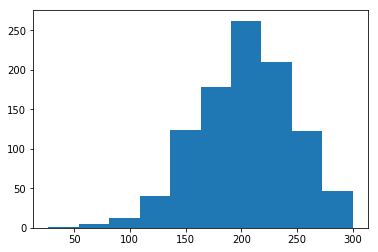

In [57]:
plt.hist(stu_df['cumulative score'])
plt.show()

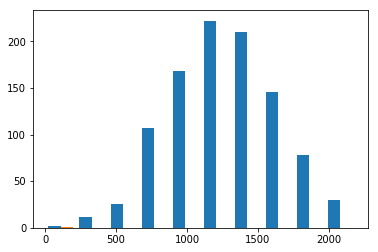

In [58]:
cumulative_box = boxcox(stu_df['cumulative score'])
plt.hist(cumulative_box)
plt.show()

In [59]:
stu_corrs = pd.concat([stu_df['cumulative score'],pd.get_dummies(stu_df[['race/ethnicity', 'gender', 'parental level of education', 'lunch', 'test preparation course']])], axis = 1)
stu_corrs

,cumulative score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,gender_female,gender_male,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,218.0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
1,247.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0
2,278.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
3,148.0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1
4,229.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1
5,232.0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1
6,275.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0
7,122.0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1
8,195.0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
9,148.0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1


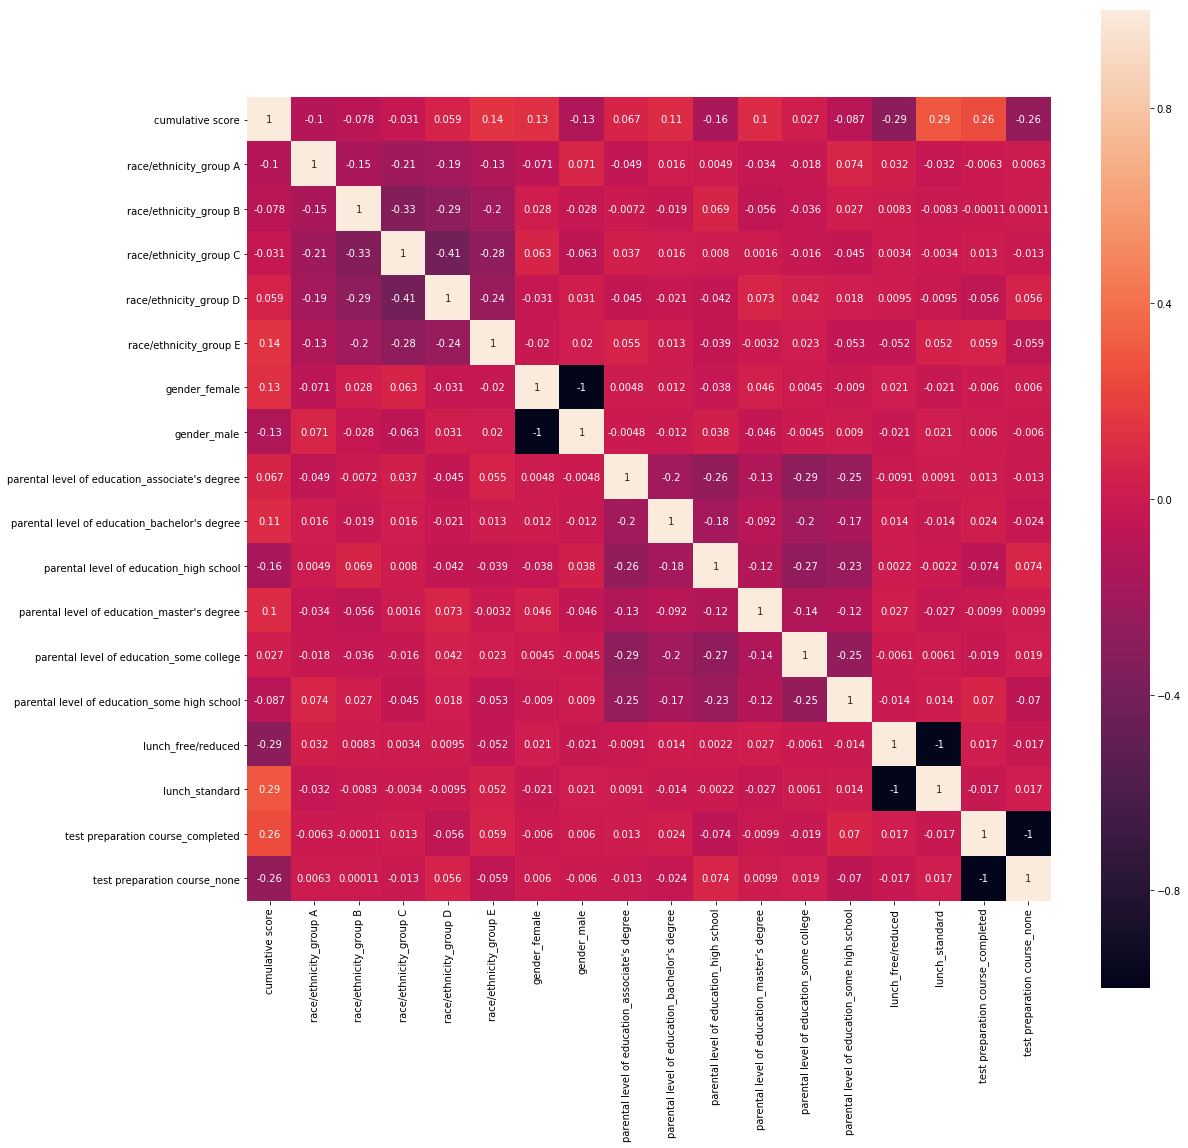

,cumulative score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,gender_female,gender_male,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
cumulative score,1.000000,-0.104821,-0.078265,-0.030659,0.058893,0.141054,0.130896,-0.130896,0.067408,0.106601,-0.161963,0.102415,0.026751,-0.087205,-0.290060,0.290060,0.256717,-0.256717
race/ethnicity_group A,-0.104821,1.000000,-0.151381,-0.213923,-0.186234,-0.126110,-0.071001,0.071001,-0.048658,0.016307,0.004919,-0.033551,-0.017751,0.073921,0.032329,-0.032329,-0.006315,0.006315
race/ethnicity_group B,-0.078265,-0.151381,1.000000,-0.331479,-0.288574,-0.195411,0.028466,-0.028466,-0.007238,-0.019121,0.069093,-0.056363,-0.036203,0.026531,0.008257,-0.008257,-0.000106,0.000106
race/ethnicity_group C,-0.030659,-0.213923,-0.331479,1.000000,-0.407797,-0.276145,0.063368,-0.063368,0.037077,0.015682,0.007977,0.001630,-0.015872,-0.045339,0.003385,-0.003385,0.012522,-0.012522
race/ethnicity_group D,0.058893,-0.186234,-0.288574,-0.407797,1.000000,-0.240402,-0.030566,0.030566,-0.044674,-0.020556,-0.042118,0.072793,0.042347,0.018402,0.009458,-0.009458,-0.055956,0.055956
race/ethnicity_group E,0.141054,-0.126110,-0.195411,-0.276145,-0.240402,1.000000,-0.020302,0.020302,0.054922,0.013221,-0.039494,-0.003180,0.023153,-0.053075,-0.052398,0.052398,0.059393,-0.059393
gender_female,0.130896,-0.071001,0.028466,0.063368,-0.030566,-0.020302,1.000000,-1.000000,0.004835,0.011638,-0.037952,0.046188,0.004460,-0.008990,0.021372,-0.021372,-0.006028,0.006028
gender_male,-0.130896,0.071001,-0.028466,-0.063368,0.030566,0.020302,-1.000000,1.000000,-0.004835,-0.011638,0.037952,-0.046188,-0.004460,0.008990,-0.021372,0.021372,0.006028,-0.006028
parental level of education_associate's degree,0.067408,-0.048658,-0.007238,0.037077,-0.044674,0.054922,0.004835,-0.004835,1.000000,-0.195386,-0.263746,-0.133757,-0.288649,-0.249426,-0.009102,0.009102,0.012668,-0.012668
parental level of education_bachelor's degree,0.106601,0.016307,-0.019121,0.015682,-0.020556,0.013221,0.011638,-0.011638,-0.195386,1.000000,-0.180595,-0.091588,-0.197647,-0.170790,0.013668,-0.013668,0.024285,-0.024285


In [49]:
stu_corrs = stu_corrs.corr()
plt.figure(figsize = (18,18))
sns.heatmap(stu_corrs, square = True, annot = True)
plt.show()
stu_corrs